In [85]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
    df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/bourne_scenario.csv")

In [16]:
df.head()

,page_no,scene_title,text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...


In [17]:
#데이터셋 살펴보기

df.shape

(320, 3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_no      320 non-null    int64 
 1   scene_title  320 non-null    object
 2   text         320 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [19]:
df.isnull().sum()

page_no        0
scene_title    0
text           0
dtype: int64

In [21]:
df['text'][0]

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

In [22]:
df['text'][5]

" 4                MARIE getting BOURNE into the bed.  Turning down the light.               Getting him settled.  Waiting for that pill to kick in.               What would he do without her?                                       BOURNE                         I'm trying, Marie, Okay?                                       MARIE                         I worry when you get like this.                3.                                       BOURNE                         It's just a nightmare.                                       MARIE                         I don't mean that.  I worry when you try                         to ignore it.                 He hesitates.  But that gets him.  He knows she's right.               And with that opening, he's letting go.  Resistance               folding.  Almost childlike.  She's gathering him in.               He's letting her do it...                                       MARIE (CONT'D)                         Sleep.  Sleep now.               

In [23]:
len(df['text'].values.sum())

204413

In [24]:
#정규 표현식 적용

df['text'][0]

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

In [38]:
import re

def apply_regular_experession(text):
    text = text.lower()
    english = re.compile('[^ a-z]')
    result = english.sub('', text)
    result = re.sub(' +', ' ', result)
    return result

In [39]:
apply_regular_experession(df['text'][0])

' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed '

In [40]:
df['processed_text'] = df['text'].apply(lambda x: apply_regular_experession(x))
df.head()

,page_no,scene_title,text,processed_text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...


In [41]:
#word Count_ 말뭉치 생성 

corpus = df['processed_text'].tolist()
corpus

[' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed ',
 ' a on his knee a syringe and a gun the eyes of the driver jarda watching bournes pov the passenger back of his head cell phone rings the head turns its conklin bourne returns his stare ',
 ' bournes eyes open panicked gasping trying to stay quiet marie sleeps ',
 ' a bourne moving for the medicine cabinet digs through the medicine cabinet downs something specific ',
 ' one minute later bourne moves out onto the veranda marie pads in watching him for a moment concerned clearly its not the first time this has happened they both look different than last we saw them his hair is longer shes a blonde hippie travelers their cottage is humble but sweet the bedroom opens to a beach and a town just down the hill club music from some all night rave wafting in from the far distance marie where were you jason bourne in the car conklin up fro

In [46]:
#Bow 벡터 생성 

from sklearn.feature_extraction.text import CountVectorizer

#filter stop words
vect = CountVectorizer(tokenizer=None, stop_words = "english", analyzer = 'word').fit(corpus)
bow_vect = vect.fit_transform(corpus)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [47]:
word_list

['aa',
 'ab',
 'abandoned',
 'abandons',
 'abbott',
 'abbottnow',
 'abbottphone',
 'abbotts',
 'abend',
 'able',
 'aboott',
 'aboutfaces',
 'absolutely',
 'abyss',
 'accelerating',
 'accented',
 'accepting',
 'accepts',
 'access',
 'accompanying',
 'accomplished',
 'account',
 'acknowledged',
 'act',
 'activity',
 'actually',
 'address',
 'adjust',
 'adrenaline',
 'affirmative',
 'afford',
 'afraid',
 'afternoon',
 'againi',
 'agencies',
 'agency',
 'agent',
 'agents',
 'agitated',
 'ago',
 'agreement',
 'agrees',
 'ah',
 'ahead',
 'aim',
 'aimed',
 'air',
 'airport',
 'alarm',
 'alert',
 'alexanderplatz',
 'alive',
 'alley',
 'alleys',
 'allocation',
 'allpoints',
 'alongside',
 'alps',
 'alright',
 'alrighti',
 'alrighttake',
 'american',
 'ammo',
 'amnesia',
 'amused',
 'anger',
 'angle',
 'ankle',
 'anonymous',
 'answer',
 'answering',
 'answers',
 'anymore',
 'anythings',
 'apology',
 'appealing',
 'appear',
 'appearing',
 'appears',
 'approached',
 'approaches',
 'approaching',
 

In [48]:
bow_vect.shape

(320, 2850)

In [49]:
count_list

array([ 3,  3,  2, ...,  1, 42,  3], dtype=int64)

In [50]:
bow_vect.toarray().sum(axis=0)

array([ 3,  3,  2, ...,  1, 42,  3], dtype=int64)

In [51]:
bow_vect.toarray().sum(axis=0).shape

(2850,)

In [53]:
#dict(zip) 통해 한번에 정리

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'aa': 3,
 'ab': 3,
 'abandoned': 2,
 'abandons': 1,
 'abbott': 128,
 'abbottnow': 1,
 'abbottphone': 4,
 'abbotts': 3,
 'abend': 2,
 'able': 1,
 'aboott': 1,
 'aboutfaces': 1,
 'absolutely': 1,
 'abyss': 1,
 'accelerating': 1,
 'accented': 1,
 'accepting': 1,
 'accepts': 1,
 'access': 3,
 'accompanying': 1,
 'accomplished': 1,
 'account': 3,
 'acknowledged': 1,
 'act': 1,
 'activity': 2,
 'actually': 3,
 'address': 3,
 'adjust': 1,
 'adrenaline': 1,
 'affirmative': 1,
 'afford': 1,
 'afraid': 1,
 'afternoon': 1,
 'againi': 1,
 'agencies': 1,
 'agency': 5,
 'agent': 2,
 'agents': 2,
 'agitated': 1,
 'ago': 10,
 'agreement': 2,
 'agrees': 1,
 'ah': 1,
 'ahead': 17,
 'aim': 1,
 'aimed': 1,
 'air': 9,
 'airport': 2,
 'alarm': 3,
 'alert': 1,
 'alexanderplatz': 3,
 'alive': 9,
 'alley': 2,
 'alleys': 1,
 'allocation': 1,
 'allpoints': 1,
 'alongside': 1,
 'alps': 1,
 'alright': 2,
 'alrighti': 1,
 'alrighttake': 1,
 'american': 4,
 'ammo': 1,
 'amnesia': 5,
 'amused': 1,
 'anger': 1,
 'ang

In [65]:
import operator

sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True) 

# key=operator.itemgetter(1) 숫자 정렬 

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35),
 ('nevins', 34),
 ('youre', 34),
 ('got', 33),
 ('im', 33),
 ('way', 33),
 ('like', 32),
 ('door', 31),
 ('gretkov', 31),
 ('coming', 30),
 ('look', 30),
 ('bournes', 29),
 ('conklin', 29),
 ('hotel', 28),
 ('shes', 28),
 ('going', 27),
 ('looking', 27),
 ('time', 27),
 ('irena', 26),
 ('thats', 26),
 ('eyes', 25),
 ('left', 25),
 ('suddenly', 25),
 ('treadstone', 25),
 ('cab', 24),
 ('trying', 24),
 ('window', 24),
 ('pov', 23),
 ('turns', 23),
 ('waiting', 23),
 ('beat', 22),
 ('cops', 22),
 ('dead', 22),
 ('face', 22),
 ('gun', 22),
 ('hands', 22),
 ('moscow', 22),
 ('people', 22),
 ('stre

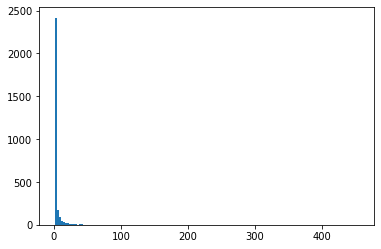

In [87]:
#단어 분포 탐색 
import matplotlib.pyplot as plt

plt.hist(list(word_count_dict.values()), bins=150)
plt.show()


In [ ]:
#텍스트 마이닝
#단어별 빈도 분석의 워드 클라우드 시각화 


In [88]:
!pip install pytagcloud pygame simplejson

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759873 sha256=e3681112a5d9eac2f8f8c27658d3cd3ce4c334268a83806cc323737909345171
  Stored in directory: c:\users\tjoeun-jg-303\appdata\local\pip\cache\wheels\be\9b\7d\911eafd2b3a1ab76aafb0d5929e7aede8db74f5436af7a2b9e
  Created wheel for simplejson: filename=simplejson-3.17.2-py3-none-any.whl size=55464 sha256=0a74fd583457f9754c0d8ad460483ae32b0433d11f43be8633d378f12fd9a980
  Stored in directory: c:\users\tjoeun-jg-303\appdata\local\pip\cache\wheels\17\72\7d\df0984c925921e22322ea462a6f861e9d0617881192deb9b8d
Successfully built pytagcloud simplejson


In [99]:
from collections import Counter

import random
import pytagcloud
import webbrowser

# ranked_tegs = Counter(word_count_dict).most_common(25)
# taglist = pytagcloud.make_tags(sorted(word_count_dict.items(), key = operator.itemgetter(1), 
#                                       reverse=True[:40], maxsize=60)
# pytagcloud.create_tag_image(taglist, 'wordcloud_example.jpg', 
#                             rectangular=False)
                               
# from IPython.display import Image
# Image(filename='wordcloud_example.jpg')

SyntaxError: invalid syntax (<ipython-input-99-ed68062f5fff>, line 10)

In [98]:
#상위 빈도수 단어 출력
Counter(word_count_dict).most_common(25)

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35)]

In [100]:
#장면별 중요 단어 시각화 

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [101]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(320, 2850)
  (0, 2788)	0.19578974958217082
  (0, 2763)	0.27550455848587985
  (0, 2412)	0.1838379942679887
  (0, 2387)	0.3109660261831164
  (0, 1984)	0.2902223973596984
  (0, 1978)	0.3109660261831164
  (0, 1898)	0.27550455848587985
  (0, 1673)	0.2902223973596984
  (0, 1366)	0.21520447034992146
  (0, 1251)	0.19855583314180728
  (0, 1001)	0.2340173008390438
  (0, 974)	0.2902223973596984
  (0, 874)	0.27550455848587985
  (0, 798)	0.1906694714764746
  (0, 237)	0.08646242181596513
  (0, 125)	0.26408851574819875


In [102]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 2850)
[[0. 0. 0. ... 0. 0. 0.]]


In [106]:
#벡터 : 단어 맵핑

invert_index_vectorizer = {v:k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{1898: 'raining', 1366: 'light', 2387: 'strobes', 2763: 'wet', 1001: 'glass', 1978: 'rhythmic', 1673..


In [107]:
#중요단어 추출 
np.argsort(tf_idf_vect[0].toarray())[0][-3:]

array([1984, 2387, 1978], dtype=int64)

In [108]:
np.argsort(tf_idf_vect.toarray())[:, -3:]

array([[1984, 2387, 1978],
       [1297, 1971, 1097],
       [1693, 2221,  968],
       [ 690,  299, 1482],
       [2823, 1951, 1454],
       [2218, 2815, 1454],
       [2038,  737, 2418],
       [ 852, 2761, 2570],
       [2022,  156, 1352],
       [2250, 2241, 1454],
       [ 342,  321, 2188],
       [ 614, 1557, 1534],
       [ 535, 1884, 1614],
       [2188,  139,   20],
       [ 503,  730, 1458],
       [2790, 2384,  724],
       [ 169,  915, 2444],
       [1905, 1259,   53],
       [2566, 1335,  828],
       [2300,  281, 1702],
       [2503, 1502, 2567],
       [ 794, 1454, 1018],
       [ 698, 2559, 1252],
       [1871,  237, 1454],
       [ 204,  911, 2591],
       [ 237,  596, 1454],
       [  52,  941, 1036],
       [ 211, 1156,  206],
       [1193, 2712, 1454],
       [  52, 1809, 2462],
       [ 237, 1454,  702],
       [2130,  237, 1454],
       [1995, 1890,  321],
       [1011,  259, 1454],
       [1985, 2216, 1819],
       [ 420, 2276, 1454],
       [2019, 1103, 2059],
 

In [111]:
top_3_word = np.argsort(tf_idf_vect.toarray())[:,-3:]
df['imporant_word_indexes'] = pd.Series(top_3_word.tolist())
df.head()

,page_no,scene_title,text,processed_text,imporant_word_indexes
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]"


In [112]:
def convert_to_word(x):
    word_list=[]
    for word in x:
        word_list.append(invert_index_vectorizer[word])
    return word_list

In [113]:
df['imporant_words'] = df['imporant_word_indexes'].apply(lambda x: convert_to_word(x))
df.head()

,page_no,scene_title,text,processed_text,imporant_word_indexes,imporant_words
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]","[riding, strobes, rhythmic]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]","[knee, returns, head]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]","[panicked, sleeps, gasping]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]","[downs, cabinet, medicine]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]","[write, remember, marie]"
